In [1]:
# general libraries 
import re
import time
import string
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
import sklearn
import xgboost as xgb

from sklearn import metrics
from collections import Counter
from datetime import datetime
from imblearn.over_sampling import SMOTE

from wordcloud import WordCloud
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# download and import NLTK libraries

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet


# import modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

/opt/conda/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[nltk_data] Downloading package stopwords to /home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [3]:
# importing dataset provided
df_reviews = pd.read_csv("/home/Capstone/sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [4]:
df_reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
df_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

<AxesSubplot:>

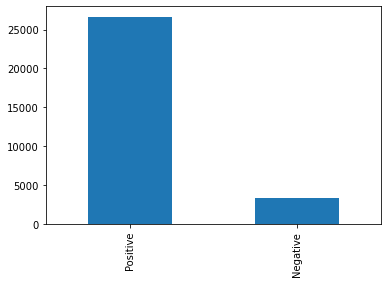

In [7]:
df_reviews['user_sentiment'].value_counts().plot(kind='bar')

In [8]:
df_reviews['reviews_rating'].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [9]:
df_reviews.reviews_didPurchase.unique()

array([nan, True, False], dtype=object)

In [10]:
df_reviews['reviews_didPurchase'] = df_reviews['reviews_didPurchase'].fillna(False)
df_reviews.reviews_didPurchase.unique()

array([False,  True])

In [11]:
# Remove the missing row of user_sentiment
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]
#map the categorical user_sentiment to numerical 1 or 0 for modelling
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [12]:
df_reviews["user_sentiment"].value_counts(normalize=True)

1    0.89
0    0.11
Name: user_sentiment, dtype: float64

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

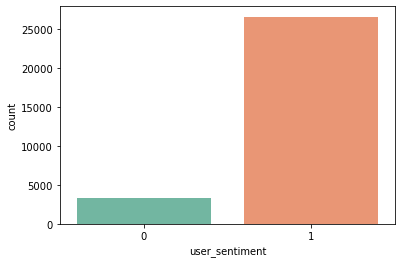

In [13]:
#Visualize using count plot
sns.countplot(x='user_sentiment', data= df_reviews, palette="Set2")

In [14]:
df_reviews["reviews_rating"].value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

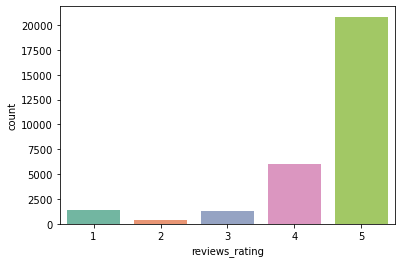

In [15]:
#visualize the user_rating..
sns.countplot(x='reviews_rating', data= df_reviews, palette="Set2")

In [16]:
df_reviews[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]].head()

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,1
11,Waste of Money,Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.,1
14,Disappointed,First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.,1
18,Pretty nice,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3
54,New formula is terrible,"I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.",1


In [17]:
df_reviews[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]].head()

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,4
96,This product has made a real difference on my skin,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,4
106,Very rich cream,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",4
117,Not greasy,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",4


As per the above analysis, there looks to be mismtach between review_rating and user_sentiment. there are records that have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive. We can either clean up those records or update the target column to the correct user sentiment, so that will be helpful for modelling. Here, updating the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4

In [18]:
df_reviews.loc[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4), "user_sentiment"] = 0

In [19]:
df_reviews.loc[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4), "user_sentiment"] = 1

In [20]:
df_reviews["user_sentiment"].value_counts()

1    26850
0     3149
Name: user_sentiment, dtype: int64

In [21]:
df_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase         0
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28070
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
dtype: int64

In [22]:
# columns reviews_userCity and reviews_userProvince have very high number of nulls
df_reviews.drop('reviews_userCity', inplace=True, axis=1)
df_reviews.drop('reviews_userProvince', inplace=True, axis=1)

In [23]:
#removing nan/null from username
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]

In [24]:
df_reviews["reviews_title"] = df_reviews["reviews_title"].fillna('')

In [25]:
df_reviews.isnull().sum()

id                        0
brand                     0
categories                0
manufacturer            141
name                      0
reviews_date             40
reviews_didPurchase       0
reviews_doRecommend    2541
reviews_rating            0
reviews_text              0
reviews_title             0
reviews_username          0
user_sentiment            0
dtype: int64

In [26]:
df_reviews["text_data"] = df_reviews[['reviews_title', 'reviews_text']].agg('. '.join, axis=1)

In [27]:
df_reviews[["text_data", "user_sentiment"]].sample(10)

,text_data,user_sentiment
22532,Build Up Makes Hair Fall Flat!. I used to marvel at how clean and bouncy my hair was....sorry not any more. I am thoroughly confused about what shampoo to switch to. I previously recommended this old one to my daughter and she promptly returned her purchase to me! My hair is over greasy with oil...,0
11002,"I love clorox wipes. I keep these in each car, in a drawer at work, under my kitchen cabinet, in the bathrooms, in the garage...I use Clorox wipes for SO much! I have used them for years and will continue to use them. This review was collected as part of a promotion.",1
18994,Mmmmmmmmmmmmmmmm. Smells super nice and disinfects efficiently. What more can you ask for!,1
1131,great on cleaning hair and giving volume. Great product will by again,1
29605,"Good Quality. This conditioner worked well. It did not leave my hair feeling greasy, and kept it clean for 72 hours (more than the 48 hours that the product boasted). I received this product for free from Influenster for testing purposes in combination with the clay mask and conditioner. All opi...",1
6265,Take out the MSG!!. I can not eat anything with Monosodium glutamate in it. I would love to eat your chili but until it is MSG free I can not,0
16136,"Don't stop selling Fig lip shimmer. This is the best of the best of all your lip products for me. Color, creaminess, shine it is my favorite lip product ever! Please don't ever stop making Fig lip shimmer!",1
25641,"good movie and extras. the movie was an enjoyable experience and good features only disappointment , some trailer scenes not in actual film",1
26850,"Very Classy. Easy assembly, just what I expected, very satisfied with my purchase. A little darker in color than the picture appears .",1
12519,Love these!. I love using these for everyday and tough cleaning jobs This review was collected as part of a promotion.,1


In [28]:
'''function to clean the text and remove all the unnecessary elements.'''
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

In [29]:
df_clean = df_reviews[['id','name', 'text_data', 'user_sentiment']]
df_clean["reviews_text"] = df_clean.text_data.apply(lambda x: clean_text(x))

In [30]:
df_clean[~df_clean.isnull()].count()
100 - round(100*df_clean[~df_clean.isnull()].count()/len(df_clean), 2)

id                0.0
name              0.0
text_data         0.0
user_sentiment    0.0
reviews_text      0.0
dtype: float64

In [31]:
df_clean.head()

,id,name,text_data,user_sentiment,reviews_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel


In [32]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
stop_words = set(stopwords.words('english'))
def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)
    
def remove_punctuation(text):
    punc_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in text:
        if char not in punc_chars:
              no_punct = no_punct + char
    return no_punct

In [33]:
lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)


stemmer = SnowballStemmer(language='english')
def stemming(text):
    words = word_tokenize(text)
    stem_words = [stemmer.stem(word) for word in words]
    return " ".join(stem_words)

In [34]:
df_clean["reviews_text_cleaned"] = df_clean.reviews_text.apply(lambda x: lemma_text(x))
df_clean["reviews_text_cleaned"] = df_clean.reviews_text_cleaned.apply(lambda x: remove_punctuation(x))

In [35]:
def generate_wordcloud(df):
    wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df.reviews_text_cleaned))
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)  
    plt.show()

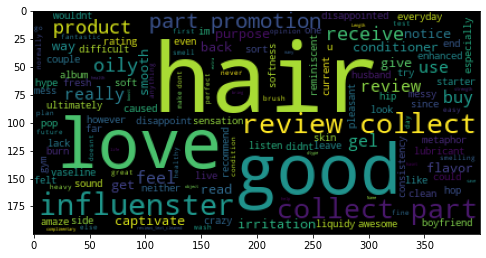

In [36]:
generate_wordcloud(df_clean)

In [37]:
# find most common words in reviews
def get_most_common_words(reviews, n_most_common):
    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in review.lower().split()]

    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if char not in string.punctuation) for review in flattened_reviews]

    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [38]:
pos_reviews = df_clean[df_clean['user_sentiment']==1]
get_most_common_words(pos_reviews['reviews_text_cleaned'],10)

[('great', 14397),
 ('love', 12430),
 ('use', 11725),
 ('product', 10805),
 ('movie', 9855),
 ('review', 8881),
 ('part', 8728),
 ('promotion', 8374),
 ('wipe', 8189),
 ('clean', 8077)]

In [39]:
neg_reviews = df_clean[df_clean['user_sentiment']==0]
get_most_common_words(neg_reviews['reviews_text_cleaned'],10)

[('product', 1934),
 ('use', 1794),
 ('hair', 1575),
 ('formula', 1439),
 ('new', 1261),
 ('like', 1090),
 ('old', 1078),
 ('good', 1075),
 ('movie', 1033),
 ('gel', 876)]

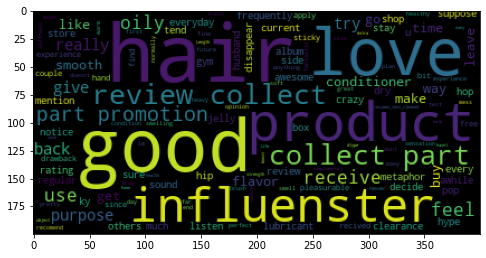

In [40]:
generate_wordcloud(pos_reviews)

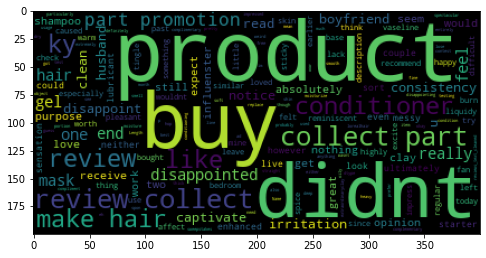

In [41]:
generate_wordcloud(neg_reviews)

In [42]:
#function to collect the n-gram frequency of words
def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    print(sum_words)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
# display the top 10 words in the bigram frequency
common_words = get_top_n_ngram(pos_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

[[1 1 1 ... 1 1 1]]


,0,1
0,review collect,7920
1,collect promotion,7920
2,clorox wipe,2803
3,great product,1944
4,great movie,1739
5,easy use,1554
6,love clorox,1223
7,love product,1137
8,use clorox,1088
9,good movie,922


In [44]:
common_words = get_top_n_ngram(neg_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

[[1 1 1 ... 1 1 2]]


,0,1
0,new formula,520
1,old formula,515
2,bring old,369
3,review collect,346
4,collect promotion,346
5,exxtra gel,205
6,use product,183
7,make hair,157
8,shampoo conditioner,147
9,gel year,127


In [45]:
X = df_clean['reviews_text_cleaned']
y = df_clean['user_sentiment']

In [46]:
for i in range(0,2):
    print("Percent of {0}s: ".format(i), round(100*pd.Series(y).value_counts()[i]/pd.Series(y).value_counts().sum(),2), "%")

Percent of 0s:  10.47 %
Percent of 1s:  89.53 %


In [47]:
# Extracting text features using tfidf vectorizer
tvec = TfidfVectorizer()
X_text = tvec.fit_transform(df_clean['reviews_text_cleaned'])

In [48]:
X_text.shape

(29936, 18390)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_text, y, random_state=42, test_size=0.25)

In [50]:
# describes info about train and test set
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (22452, 18390)
Shape of y_train dataset:  (22452,)
Shape of X_test dataset:  (7484, 18390)
Shape of y_test dataset:  (7484,)


In [51]:
counter = Counter(y_train)
print('Before OverSampling, the shape of dataset :',counter)

sm = SMOTE(random_state = 0)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
  
counter = Counter(y_train)
print('After OverSampling, the shape of dataset :',counter)

Before OverSampling, the shape of dataset : Counter({1: 20087, 0: 2365})
After OverSampling, the shape of dataset : Counter({1: 20087, 0: 20087})


In [52]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("\n")
        self.confusion_matrix(y_pred_class)
        print("\n")
        
        metrics.plot_roc_curve(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1score = metrics.f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(metrics.classification_report(self.y_test, y_pred_class))

## Logistic Regression

In [53]:
# build the Logistic Regression model.
%time
logreg = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_model = ModelBuilder(logreg, X_train, X_test, y_train, y_test)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 18.1 µs




Accuracy is : 90.1%
Precision is : 97.1%
Recall is : 91.6%
F1 Score is : 94.3%
Roc-Auc Score is:92.6%


              precision    recall  f1-score   support

           0       0.51      0.76      0.61       770
           1       0.97      0.92      0.94      6714

    accuracy                           0.90      7484
   macro avg       0.74      0.84      0.78      7484
weighted avg       0.92      0.90      0.91      7484





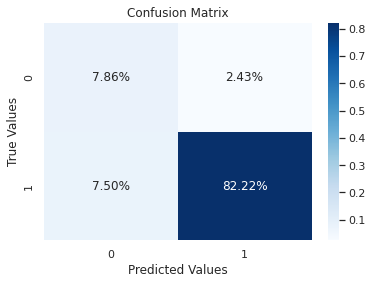

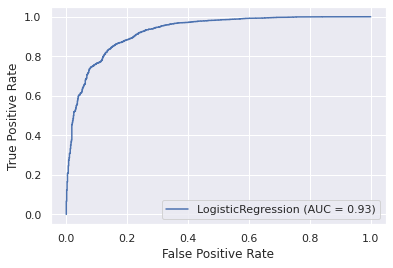

In [54]:
# Train and Predict the Test Labels
y_pred_class  = lr_model.train_model()
lr_metrics = lr_model.evaluate_model(y_pred_class)

## Naive Bayes

In [55]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB

In [56]:
mnb = MultinomialNB(alpha=1.0)
mnb_model = ModelBuilder(mnb, X_train, X_test, y_train, y_test)



Accuracy is : 84.6%
Precision is : 97.9%
Recall is : 84.7%
F1 Score is : 90.8%
Roc-Auc Score is:91.9%


              precision    recall  f1-score   support

           0       0.39      0.84      0.53       770
           1       0.98      0.85      0.91      6714

    accuracy                           0.85      7484
   macro avg       0.68      0.84      0.72      7484
weighted avg       0.92      0.85      0.87      7484





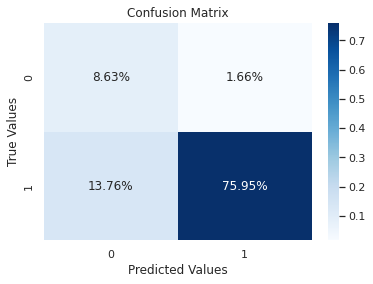

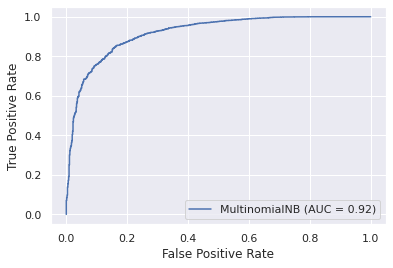

In [57]:
# Train and Predict the Test Labels
y_pred_class  = mnb_model.train_model()
nb_metrics = mnb_model.evaluate_model(y_pred_class)

## Decision Tree

In [58]:
dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)
dt_model = ModelBuilder(dt, X_train, X_test, y_train, y_test)



Accuracy is : 80.1%
Precision is : 95.1%
Recall is : 82.1%
F1 Score is : 88.1%
Roc-Auc Score is:82.1%


              precision    recall  f1-score   support

           0       0.29      0.63      0.39       770
           1       0.95      0.82      0.88      6714

    accuracy                           0.80      7484
   macro avg       0.62      0.72      0.64      7484
weighted avg       0.88      0.80      0.83      7484





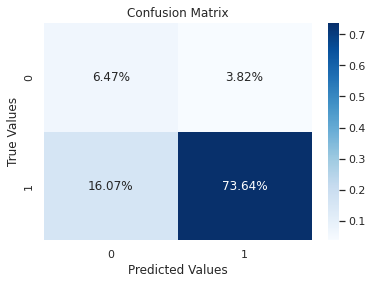

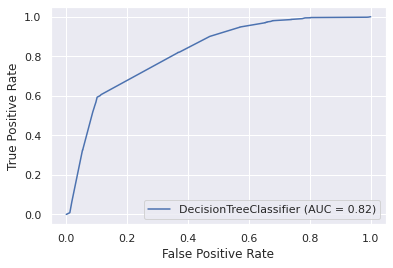

In [59]:
y_pred_class  = dt_model.train_model()
dt_metrics_cv = dt_model.evaluate_model(y_pred_class)

## Random Forest

In [60]:
rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")

In [61]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,15,20],
    'n_estimators': [5,10, 25, 50]
}

In [62]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")
%time
grid_search.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    2.7s
/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/opt/conda/lib/python3.8/site-packages/skl

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [5, 10, 25, 50]},
             scoring='f1', verbose=1)



Accuracy is : 88.9%
Precision is : 94.7%
Recall is : 92.8%
F1 Score is : 93.7%
Roc-Auc Score is:87.9%


              precision    recall  f1-score   support

           0       0.46      0.55      0.50       770
           1       0.95      0.93      0.94      6714

    accuracy                           0.89      7484
   macro avg       0.71      0.74      0.72      7484
weighted avg       0.90      0.89      0.89      7484





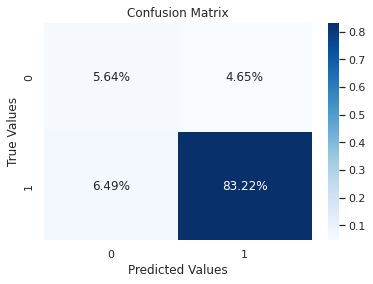

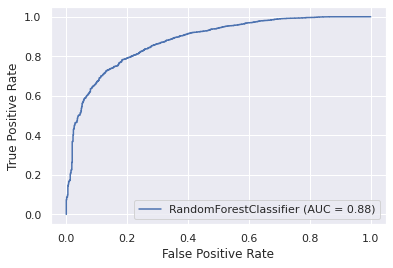

In [66]:
rf_best = grid_search.best_estimator_
rf_modebuilder = ModelBuilder(rf_best, X_train, X_test, y_train, y_test)

# Train and Predict the Test Labels
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

## XGBoost

In [67]:
xgclf = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42) #based on the tuned parameters
xg_model = ModelBuilder(xgclf, X_train, X_test, y_train, y_test)

[15:35:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy is : 92.0%
Precision is : 95.1%
Recall is : 95.9%
F1 Score is : 95.5%
Roc-Auc Score is:91.1%


              precision    recall  f1-score   support

           0       0.62      0.57      0.59       770
           1       0.95      0.96      0.96      6714

    accuracy                           0.92      7484
   macro avg       0.78      0.77      0.78      7484
weighted avg       0.92      0.92      0.92      7484





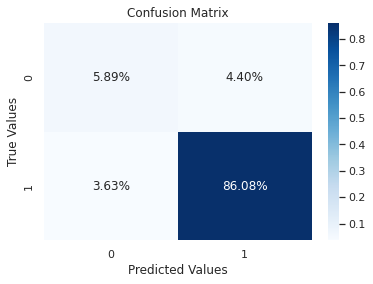

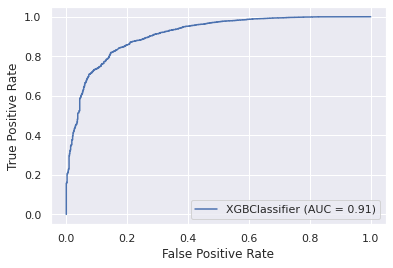

In [68]:
# Train and Predict the Test Labels
y_pred_class  = xg_model.train_model()
xg_metrics = xg_model.evaluate_model(y_pred_class)

In [69]:
# Creating a table which contain all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': nb_metrics,
        'Decision Tree': dt_metrics_cv,
         'Random Forrest': rf_metrics,
        'XG Boost': xg_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forrest',
                                                    'XG Boost'] )

df_metrics

,Metric,Logistic Regression,Naive Bayes,Decision Tree,Random Forrest,XG Boost
0,Accuracy,0.90,0.85,0.80,0.89,0.92
1,Precision,0.97,0.98,0.95,0.95,0.95
2,Recall,0.92,0.85,0.82,0.93,0.96
3,F1Score,0.94,0.91,0.88,0.94,0.96
4,Auc Score,0.93,0.92,0.82,0.88,0.91


- Comparing the above models on the metrics, XG Boost looks to be a better model, saving the XG Boost model as a pickle file for later use
## Saving the model

In [95]:
def save_object(obj, filename):
    pickle.dump(obj, open("pickle/"+filename+".pkl", 'wb'))

In [96]:
save_object(xgclf, 'xg-boost-model')

In [97]:
save_object(tvec, 'tfidf-vectorizer')

In [98]:
save_object(df_clean, 'cleaned-data')